given LP


------------------------------
Step  0
Unzulaessiges Dict


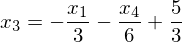

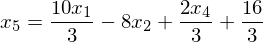

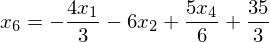

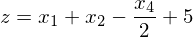

------------------------------
Step  1


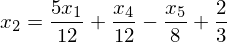

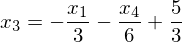

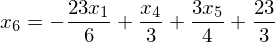

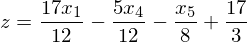

------------------------------
Step  2


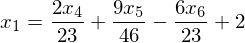

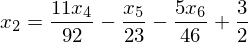

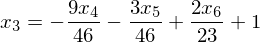

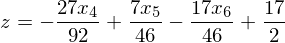

------------------------------
Step  3


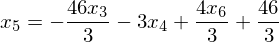

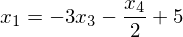

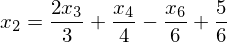

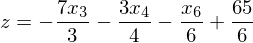

------------------------------


In [8]:
from IPython.display import display
import numpy as np
from sympy import *

# -----------------------------------------------------------------
### Globlas ###
init_printing()
LIMIT = 100  # im Fall von kreisen
ein, ver = var('eintretende verlassende')

# Hilfsfunktionen
base_zero = lambda X: [i - 1 for i in X]  # Wandel eine Liste in Basis 1 um (für die LP-Basis)


# Eine Klasse um ein LP-Problem zu repräsentieren
class LP:
    def __init__(self, A, b, c, B):
        self.A = A
        self.b = b
        self.c = c
        self.B = B  # zur Basis 1 (nicht 0)

# -----------------------------------------------------------------
def sympy_simplex(lp):
    ### define the variables ###
    A, b, c, B = lp.A, lp.b, lp.c, lp.B
    m , n = A.shape[0], A.shape[1]
    z = symbols('z')
    x = symbols(' '.join(['x' + str(i) for i in range(1, n+m+1)])) # 1 -> n+m

    ### create rows ###
    rows = []
    for i in range(m):
        row = Eq(x[i + n], int(b[i]))
        nbv = [-1 * int(A[i,j]) * x[j] for j in range(n)]
        for k in range(len(nbv)):
            row = Eq(row.lhs, row.rhs + nbv[k])
        rows.append(row)

    ### create ziel ###
    ziel = Eq(z, 0)
    for i in range(len(c)):
        ziel = Eq(ziel.lhs, ziel.rhs + int(c[i]) * x[i])

    ### B and N ###
    # assuming B at the start is the slack variables (i.e. Dict feasible)
    N = [x[i] for i in range(n)]
    B = [x[i + n] for i in range(m)]

    ### show the given problem ###
    print("given LP")
    for row in rows:
        display(row)
    display(ziel)
    print("-" * 30)

    # -----------------------------------------------------------------
    ### Solving ###
    for i in range(LIMIT):
        # eintretende Variable finden
        # auswaehlen nach dem Teknik in der Vorlesung
        # (d.h. var mit grosstem Koeffizeint)
        eintretende = None
        max_eintretende = -oo
        for var, coeff in ziel.rhs.as_coefficients_dict().items():
            # 1 is the first coeff i.e. the value of the ziel function
            if var != 1 and coeff > 0 and coeff > max_eintretende:
                max_eintretende = coeff
                eintretende = var

        # falls keien positive costs => optimal
        if eintretende == None:
            break

        # verlassende Variable finden
        verlassende = None
        min_wert = +oo
        min_row = None

        for row in rows:
            if row.has(eintretende):
                new_row = row
                for nbv in N:
                    if nbv != eintretende:
                        new_row = new_row.subs(nbv, 0)
                wert = solve(new_row.rhs >= 0).as_set().right
                if wert < min_wert:
                    min_wert = wert
                    min_row = row
                    verlassende = row.lhs

        # display eintretende und verlassende Variablen
        print("Step ", i)
        if i == 0: print("Unzulaessiges Dict")
        display(Eq(ein, eintretende))
        display(Eq(ver, verlassende))

        # die Formlen umsetzen und rows updaten
        new_formel = Eq(eintretende, solve(min_row, eintretende)[0])
        new_rows = [new_formel]
        for row in rows:
            if row.lhs != verlassende:
                new_rows.append(
                    Eq(row.lhs, row.rhs.subs(eintretende, new_formel.rhs))
                )
        rows = new_rows

        # new ziel
        ziel = Eq(z, ziel.rhs.subs(eintretende, new_formel.rhs))

        # update B, N
        B.remove(verlassende);
        B.append(eintretende)
        N.remove(eintretende);
        N.append(verlassende)

        # show current solution
        for row in rows:
            display(row)
        display(ziel)
        print("-" * 30)

# -------------------------------------------------------------------------------
blatt2_aufgabe1 = LP(
    np.matrix('2 0 6; -2 8 4; 3 6 5'),
    np.matrix('10; 12; 20'),
    np.matrix('2; 1; 3; 0; 0; 0'),
    [4, 5, 6])

sympy_simplex(blatt2_aufgabe1)